### Statistical Analysis of Indian Unicorns and Amount of Funding Start Ups have recieved in India 

#### Our goal is to identify start up industry and try to understand what influences the fund that they recieve, which makes them stay longer, and also identify what sectors and sub-sectors this start ups are to know which sectors are recieving funds and which are not. 

For the first data of funding available we do not have data about the start ups industry 

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
funding_data = pd.read_csv('fundingdata.csv')

In [12]:
funding_data.dtypes

Start Date                      object
End Date                        object
Total Funding Amount(in USD)     int64
HF-Startup name                 object
Highest Funding                  int64
Total Deals                      int64
Undisclosed Deals                int64
Year                             int64
dtype: object

In [13]:
funding_data.corr()

,Total Funding Amount(in USD),Highest Funding,Total Deals,Undisclosed Deals,Year
Total Funding Amount(in USD),1.000000,0.961993,0.058931,-0.144258,0.195747
Highest Funding,0.961993,1.000000,-0.032516,-0.128354,0.091455
Total Deals,0.058931,-0.032516,1.000000,0.610030,-0.210299
Undisclosed Deals,-0.144258,-0.128354,0.610030,1.000000,-0.505479
Year,0.195747,0.091455,-0.210299,-0.505479,1.000000


It is clear total funding is related to Highest funding 

In [14]:
funding_data.head(10)

,Start Date,End Date,Total Funding Amount(in USD),HF-Startup name,Highest Funding,Total Deals,Undisclosed Deals,Year
0,22-03-2020,28-03-2020,5700000,CoinDCX,3000000,8,3,2020
1,16-03-2020,21-03-2020,960000000,Oyo,807000000,16,1,2020
2,09-03-2020,14-03-2020,22000000,MultiLiving,6000000,10,2,2020
3,02-03-2020,07-03-2020,123000000,Spinny,43700000,16,3,2020
4,24-02-2020,29-02-2020,139000000,Rupeek,30000000,16,5,2020
5,17-02-2020,22-02-2020,394000000,Swiggy,113000000,20,2,2020
6,10-02-2020,15-02-2020,148000000,Pepperfry,40000000,20,4,2020
7,03-02-2020,08-02-2020,287000000,Byju's,200000000,14,2,2020
8,27-01-2020,01-02-2020,192000000,MoneyTap,70000000,15,2,2020
9,20-01-2020,25-01-2020,350000000,Bounce,105000000,18,5,2020


In [15]:
funding_data.groupby('Year')['Total Funding Amount(in USD)'].sum()

Year
2016     3897088608
2017    10429309730
2018    10571800000
2019    12576650000
2020     3350700000
Name: Total Funding Amount(in USD), dtype: int64

In our data there is no correlation or increase in funding by Year

### Understanding Unicorn Start Ups in India 

In [66]:
india_unicorn = pd.read_excel("Indian_Unicorns.xlsx")

In [67]:
india_unicorn.head()

,No.,Company,Sector,Valuation ($B),Entry,Location
0,1,Nykaa,E-Commerce,1.2,2020,Mumbai
1,2,BigBasket,Groceries,1.0,2019,Bangalore
2,3,Rivigo,Logistics Services,1.0,2019,Delhi NCR
3,4,Delhivery,Logistics Services,1.6,2019,Delhi NCR
4,5,Dream11,Gaming,1.1,2019,Mumbai


### Columns Explanation 
Entry - Tells us when they were valued at that price    
Company - Name of the company    
Sector - The Sector a company is operating   
Location - Where this Start Up Headquarter is Located   

Text(0, 0.5, 'Amount Invested in Different Startup in Billions($)')

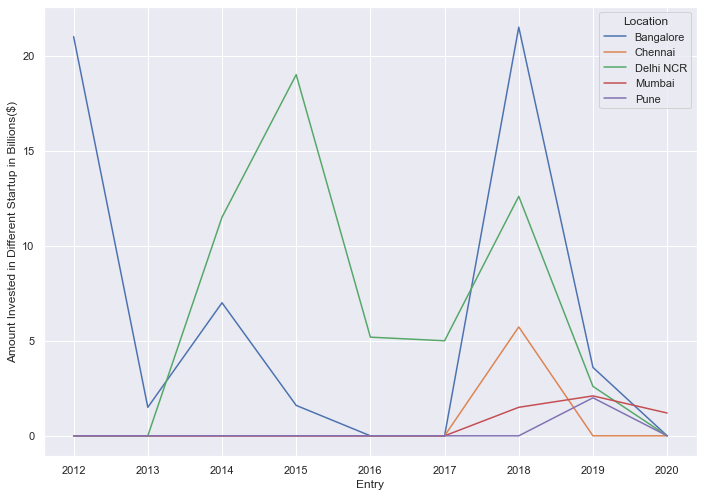

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.pivot_table(india_unicorn, values='Valuation ($B)', index=['Entry'],
                    columns=['Location'], aggfunc=np.sum, fill_value=0 ).plot()
plt.ylabel("Amount Invested in Different Startup in Billions($)");

In [81]:
pd.pivot_table(india_unicorn, values='Valuation ($B)', index=['Entry'],
                    columns=['Location'], aggfunc=np.sum, fill_value=0 )

Location,Bangalore,Chennai,Delhi NCR,Mumbai,Pune
Entry,,,,,
2012,21.0,0.00,0.00,0.0,0
2013,1.5,0.00,0.00,0.0,0
2014,7.0,0.00,11.50,0.0,0
2015,1.6,0.00,19.00,0.0,0
2016,0.0,0.00,5.19,0.0,0
2017,0.0,0.00,5.00,0.0,0
2018,21.5,5.73,12.60,1.5,0
2019,3.6,0.00,2.60,2.1,2
2020,0.0,0.00,0.00,1.2,0


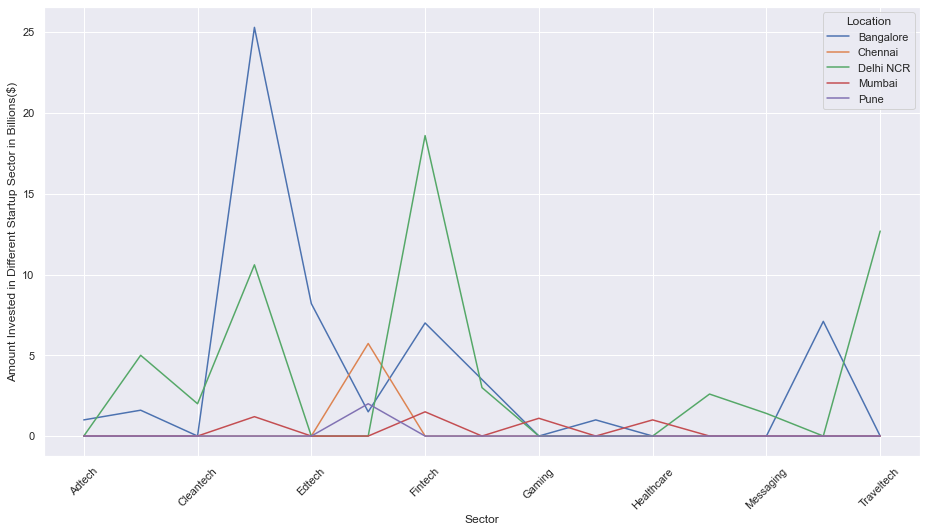

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
pd.pivot_table(india_unicorn, values='Valuation ($B)', index=['Sector'],
            columns=['Location'], aggfunc=np.sum, fill_value=0 ).plot()
plt.xticks(rotation = 45)
plt.ylabel("Amount Invested in Different Startup Sector in Billions($)")
plt.show()

In [80]:
pd.pivot_table(india_unicorn, values='Valuation ($B)', index=['Sector'],
                    columns=['Location'], aggfunc=np.sum, fill_value=0 )

Location,Bangalore,Chennai,Delhi NCR,Mumbai,Pune
Sector,,,,,
Adtech,1.0,0.00,0.00,0.0,0
Classifieds,1.6,0.00,5.00,0.0,0
Cleantech,0.0,0.00,2.00,0.0,0
E-Commerce,25.3,0.00,10.60,1.2,0
Edtech,8.2,0.00,0.00,0.0,0
Enterprise Tech,1.5,5.73,0.00,0.0,2
Fintech,7.0,0.00,18.60,1.5,0
Foodtech,3.5,0.00,3.00,0.0,0
Gaming,0.0,0.00,0.00,1.1,0


In both diagram there is no noticeable trend 

In [43]:
india_unicorn.head(2)

,No.,Company,Sector,Valuation ($B),Entry,Location
0,1,Nykaa,E-Commerce,1.2,2020,Mumbai
1,2,BigBasket,Groceries,1.0,2019,Bangalore


In [48]:
#dropping columns that are not useful
india_unicorn.drop(["Company", "No."], axis=1, inplace=True)

In [49]:
#converting columns to categorical variables so our model can recognise them
india_unicorn['Sector'] = india_unicorn['Sector'].astype('category')
india_unicorn['Sector'] = india_unicorn["Sector"].cat.codes

In [56]:
#converting columns to categorical variables so our model can recognise them
india_unicorn['Entry'] = india_unicorn['Entry'].astype('category')
india_unicorn['Entry'] = india_unicorn["Entry"].cat.codes

In [51]:
#converting columns to categorical variables so our model can recognise them
india_unicorn['Location'] = india_unicorn['Location'].astype('category')
india_unicorn['Location'] = india_unicorn["Location"].cat.codes

In [58]:
X = india_unicorn.drop("Valuation ($B)", axis=1)
y = india_unicorn[['Valuation ($B)']]
X = sm.add_constant(X)

In [59]:
mod = sm.OLS(y, X)

In [60]:
res = mod.fit()       # Fit model

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Valuation ($B)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3.335
Date:                Fri, 05 Mar 2021   Prob (F-statistic):             0.0325
Time:                        14:33:47   Log-Likelihood:                -93.635
No. Observations:                  34   AIC:                             195.3
Df Residuals:                      30   BIC:                             201.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6203      1.968      4.380      0.0

Our model is somehow but not very useful in determining the target variable Valuation,    

Since our goal is to understand what influences start ups Valuations, i.e. what influences start up success    
if measured by their valuation, we notice here that Entry(which just tells us when this startup was valued),    
and location(which can tell us about availability of talent or customers) and sectors(which tells us the industry   
the start up operates in), does not have any influence is determining our successful a start up from our data is. 

Perhaps if we have more data we can find more data we might reach a better conclusion

References    

> Stats model  [Data to Fish Website ](https://datatofish.com/statsmodels-linear-regression/)